In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

from IPython.display import display
import pandas as pd

C:\Users\Noah\AppData\Local\Temp\ipykernel_21300\3380331259.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Damped Harmonic Motion

## Starting on Part 2 of labbook first -- Electrical System

### Underdamped System
Plugged in all probes to set up a series RLC circuit. Resistance is given by a variable resistance box, whereas the capacitor and inductor are set components. The capacitor's value is 1108pF, and the inductor's value is 10.0mH. The inductor's resistance and the resistance of the decade box when set to 0Ω were measured using a multimeter and found to be  24.57Ω and 0.24Ω respectively.

First we set the variable resistor to its minimum value (0Ω).

** Were having issues with oscilloscope when probes were reversed. Set them the correct way (red to +ve, black to gnd) and all problems were fixed.

Next, measured the period of oscillations by using cursor functionality on the oscilloscope to determine time between the first observed peak and a peak near the end of the oscillations. This was done because by then dividing by the number of oscillations, we are taking an average of each period which is more accurate than a single measurement. Initial number of periods we measured over was 4 -- subject to change depending on damping.The period was determined to be 21.7us

Next we measured the voltage at each peak using the cursor function. If we plot the natural log of our voltage values as a function of time elapsed, the plot should be linear. A test plot shows this is true.

**DATA IS DISPLAYED IN A TABLE BELOW**

Error on voltage reading is +/- 0.4V. Minimum step size on cursors is 0.2V, so we're giving ourselves two increments of wiggle room\
Error on time is +/- 0.4us. Step size is 0.2us and we think we have measurements within one step size on either side.

The damping coefficient (gamma value) was determined by taking a linear regression of the linearized data then using the relationship m = gamma/2, we calculated gamma to be ~16100, which is within error of the expected value.

In [3]:
rInductor_ohms = 24.57
lInductor_H = 10e-3

cCapacitor_farads = 1108e-12



rTestValues_ohms = [0]

# Underdamped Case
measuredOscillationPeriods_s = (86.6e-6/4)
print(f"Oscillation Period = {measuredOscillationPeriods_s}s")
print(f"Angular Frequency = {2*np.pi/measuredOscillationPeriods_s}s")

measuredDampedVoltages_V = np.array([10, -7, 5, -3.6, 2.4, 
                                     -1.8, 1.2, -1.0, 0.6, -0.4])

timeVals_s = np.arange(0, 5*86.6e-6, step=86.6e-6/2)

df = pd.DataFrame({"Voltage Readings" : measuredDampedVoltages_V, 
                   "Time (us)" : timeVals_s*1e6})

linearVoltageVals = np.log(np.abs(measuredDampedVoltages_V))

regressionAnalysis = st.linregress(timeVals_s, linearVoltageVals)
gammaVal = abs(2*regressionAnalysis[0])

naturalFrequency = ((2*np.pi/measuredOscillationPeriods_s)**2 + (gammaVal/2)**2)**0.5
print(f"Natural frequency is: {naturalFrequency}")

print(f"Gamma value is: {gammaVal}")

display(df)

Oscillation Period = 2.165e-05s
Angular Frequency = 290216.41141707095s
Natural frequency is: 290329.14199927694
Gamma value is: 16179.64625493443


,Voltage Readings,Time (us)
0,10.0,0.0
1,-7.0,43.3
2,5.0,86.6
3,-3.6,129.9
4,2.4,173.2
5,-1.8,216.5
6,1.2,259.8
7,-1.0,303.1
8,0.6,346.4
9,-0.4,389.7


In [8]:
linReg = st.linregress(timeVals_s, linearVoltageVals)
linRegVals = linReg[0]*timeVals_s + linReg[1]

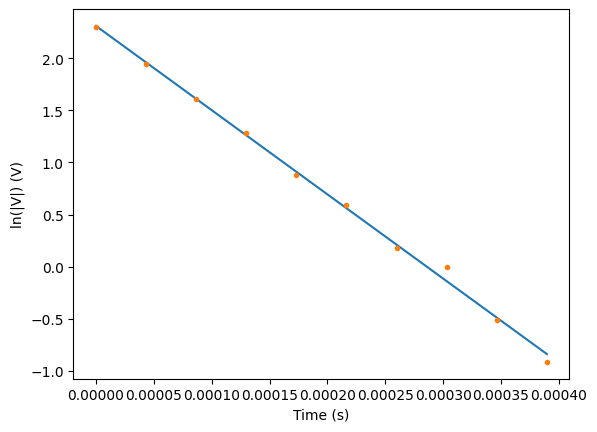

In [9]:
timeError_us = 0.4

plt.plot(timeVals_s, linRegVals, label="Linear Regression Model")
plt.plot(timeVals_s, linearVoltageVals, '.')
plt.xlabel("Time (s)")
plt.ylabel("ln(|V|) (V)")

plt.show()

#### Determining the angular frequency of the circuit

Removed the decade box from the series circuit and set the square wave reading on the oscilloscope so that it takes up 8 divisions. Plugged the decade box in parallel with the function generator, and tried resistances until the ouput of the function generator was halved. This tells us the resistance of the signal generator, which was determined to be 599.7Ω to match the resistance of the oscilloscope.

### Critically Damped System

To determine the required resistance we reconnected the series RLC circuit in the same sequence (R -> L -> C). Resistances on the decade box were then increased and the resistance required to get to no overshoot (critically damped) was found to be 4498Ω (decade box set at 4500, then measured using oscilloscope). Add this to the inductor's resistance to determine the total resistance of the circuit

In [10]:
theoreticalCriticalR_ohms = (4*lInductor_H/cCapacitor_farads)**0.5
print(f"The system's theoretical critical damping resistance is {theoreticalCriticalR_ohms}")

The system's theoretical critical damping resistance is 6008.417681261097


Using the formula R = (4L/C)**0.5, we calculated the expected critical damping resistance. Noticeably there is a big discrepancy between what is expected and measured. Most likely systematic error/error in some component. Further analysis required.

## Overdamped System

Not much to say here other than that the system took longer to flatten out when the resistance was set higher... as expected.

**For all scenarios above, we took the csv data files of our waveforms**

## Now working on part 1 of labbook - Mechanical System

### **IMPORTANT IMPORTANT** -- 0 POINT NOT at 0cm, 0 is at 0.025cm

### Underdamped Situation

Using a galvanometer, we are going to determine the period of the mechanisms oscillations. Originally the decade resistor is set to 10 000Ω, and the potentiometer which controls charging is set to 30% of the maximum 500Ω.

Like with the electrical oscillator, we measured multiple oscillatory periods then divided by the number of periods we measured across. The timer button is very hard to press which makes getting accurate measurements rather hard. This makes it even more important that we take an average over multiple periods.

Measured time for two period = 15.63s\
from this we can determine the angular frequency of the oscillator.

We then recorded the peaks of each oscillation and once again plotted the relationship ln(abs(peaks)) as a function of time elapsed. The peaks are expected to decay logarithmically so by taking the natural of them, the relatioship should be linear. We found this to be true in our plot. **The data collected is shown in a table below**

We also calculated the Angular frequency and the damping constant for the system, and had similar results for all our numbers to the group performing the experiment at the same time as us. Damping constant calculated using gamma/2 = slope of graph relationship, and angular frequency using omega = 2pi/T

In [11]:
mechanicalOscillationPeriod_s = 15.63/2
mechanicalAngularFrequency = 2*np.pi/mechanicalOscillationPeriod_s

print(f"Oscillation Period = {mechanicalOscillationPeriod_s}s")
print(f"Angular Frequency = {2*np.pi/mechanicalOscillationPeriod_s}")

Oscillation Period = 7.815s
Angular Frequency = 0.8039904423774262


Gamma value = 0.3891166756117924


,Displacement Peaks (cm),Time Values (s)
0,18.50,0.0000
1,7.80,3.9075
2,3.70,7.8150
3,1.70,11.7225
4,0.70,15.6300
5,0.40,19.5375
6,0.15,23.4450
7,0.10,27.3525


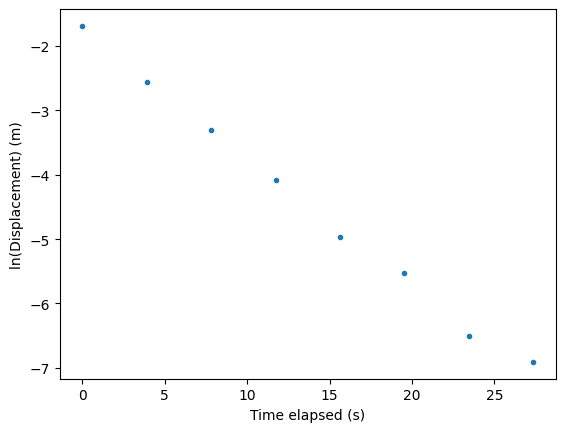

In [12]:
mechanicalOscillationPeaks_m = np.array([18.5, 7.8, 3.7, 1.7, 
                                         0.7, 0.4, 0.15, 0.1])/100

mechanicalTimeValues_s = np.arange(0, mechanicalOscillationPeriod_s*4, 
                                   mechanicalOscillationPeriod_s/2)

df = pd.DataFrame({"Displacement Peaks (cm)":mechanicalOscillationPeaks_m*100, 
                   "Time Values (s)":mechanicalTimeValues_s})

linearMechanicalOscillations = np.log(mechanicalOscillationPeaks_m)

mechLinearRegression = st.linregress(mechanicalTimeValues_s, 
                                     linearMechanicalOscillations)
mechGammaVal = abs(mechLinearRegression[0]*2)
print(f"Gamma value = {mechGammaVal}")

display(df)

plt.plot(mechanicalTimeValues_s, linearMechanicalOscillations, '.')
plt.xlabel("Time elapsed (s)")
plt.ylabel("ln(Displacement) (m)")

plt.show()


### Critically damped situation
Now we want to critically damp the system. To do this we incrementally increased the resistance of the decade box until the galvanometer appeared to never overshoot the 0 point. Resistance of the decade box was set to 31Ω when we observed critical damping.

Next step was to make multiple measurements for the time that it takes the system to go from 0 to a maximum. This maximum was around 3.65cm. We then averaged all the periods to get a better idea of the actual time. We took 5 measurements of the time and averages them to determine the final period in seconds.

t1 = 1.63\
t2 = 1.5\
t3 = 1.69\
t4 = 1.53\
t5 = 1.66

Note that as the galvanometer originally rotates up to a maximum when released, it reaches 3.65cm deviation.

Using the equation x = V*t*exp(-(gamma/2)*t), where t is the ramp time. We can rearrange to find gamma:

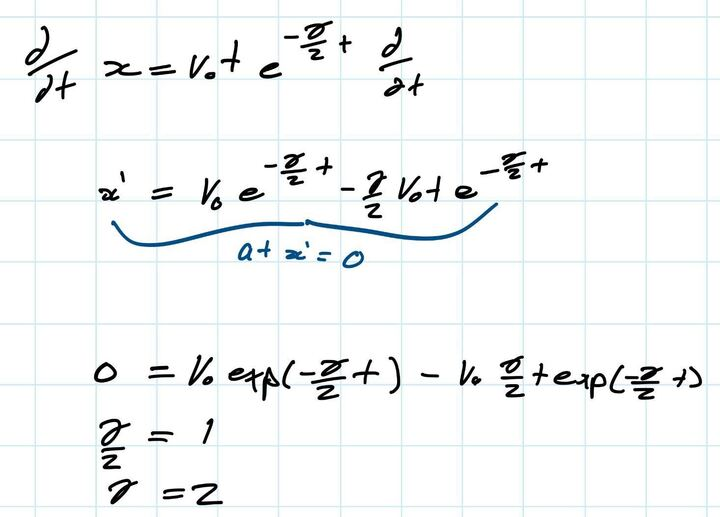

Once we've rearranged for gamma we can compare it to the predicted value which is calculated using the formula gamma = 2*angularFrequency. We see that they are pretty close together so I think we're fine.

# THIS IS ALL WRONG LOOOOOL

In [16]:
avgRampTime = np.average(np.array([1.63, 1.5, 1.69, 1.53, 1.66]))

print(f"Critically Damped Decay time = {avgRampTime}")

predictionGamma = 2*mechanicalAngularFrequency
print(f"Value from prediction formula for gamma = {predictionGamma}")

Avg Ramp Time = 1.6019999999999999
Critically Damped Decay time = 1.6019999999999999
Value from prediction formula for gamma = 1.6079808847548525


# FIXED BELOW HERE
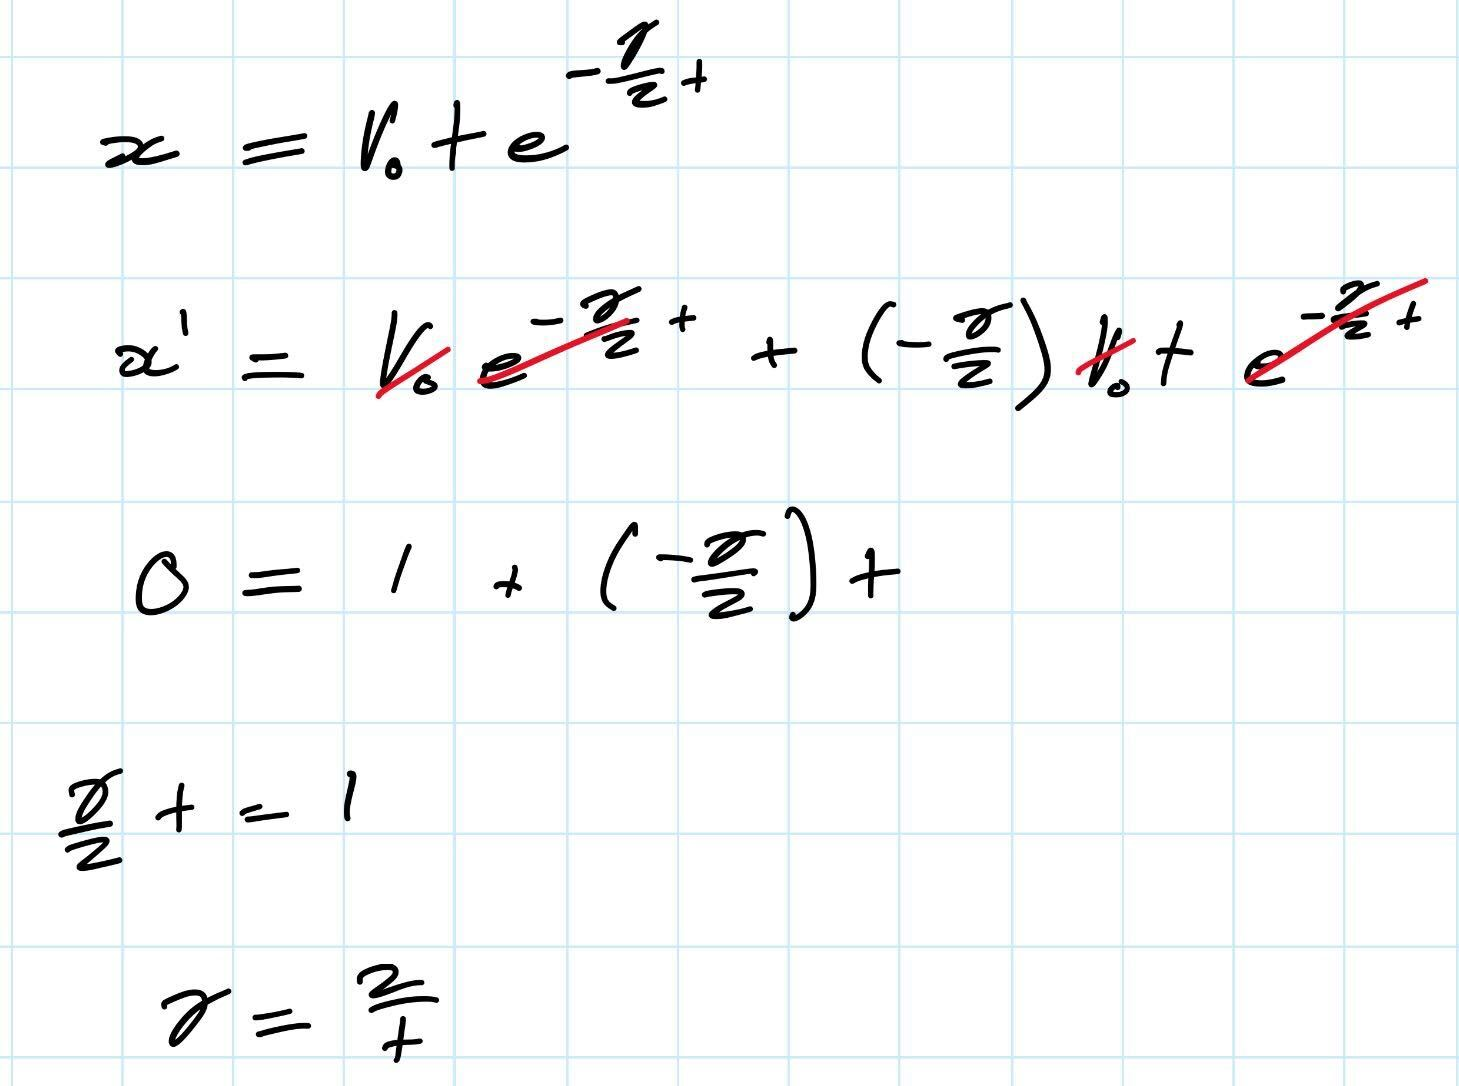
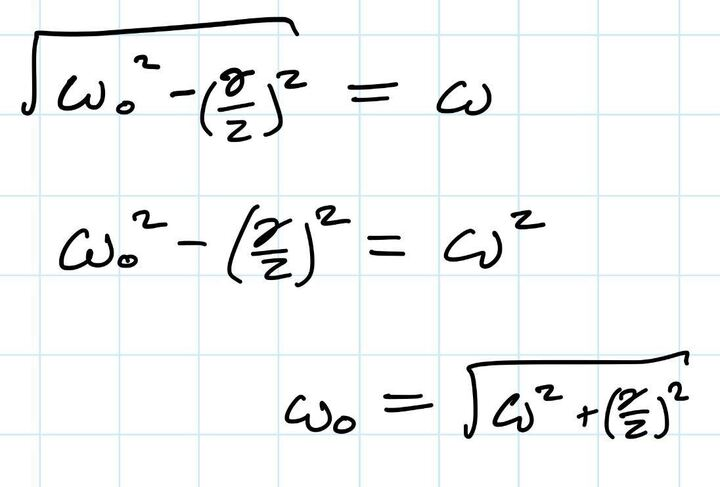

In [15]:
# From the underdamped situation above, we can determine the natural frequency of the oscillator.

naturalFrequency = (mechanicalAngularFrequency**2 + (mechGammaVal/2)**2)**0.5
print(f"Natural Frequency of Oscilllator = {naturalFrequency}")


predictionGamma = 2*naturalFrequency
calculatedGamma = 2/avgRampTime

print(f"FIXED predicted gamma = {predictionGamma}")
print(f"FIXED Calculated gamma = {calculatedGamma}")

Natural Frequency of Oscilllator = 0.8271962150808252
FIXED predicted gamma = 1.6543924301616504
FIXED Calculated gamma = 1.2484394506866419


### OBSERVATIONS
Notably, the predicted and calculated damping coefficients aren't really similar. For critically damped systems, the damping coefficient should be about 1, which the calculated value is very close to. Note though that all measurements were made with a shitty stopwatch, and are therefore inherently very innacurate. Only one measurement was taken to determine the period of the underdamped system, and it could have very well been wrong. Since that assumed period measurement was then used to extrapolate to find the timing for each minimum and maximum, if the original measurement was slightly off, it would have amplified the issue down the line. If this experiment were to be redone, multiple measurements should be taken then averaged to get a more accurate measure of the period of the system. 

### Overdamped situation

Now we have the decade box set to 10Ω. Completing the same measurements as for the critically damped situation, we got the following values in seconds.

t1 = 1.35
t2 = 1.31
t3 = 1.37
t4 = 1.44
t5 = 1.43

Note that as the galvanometer originally rotates up to a maximum when released, it reaches 1.4cm deviation.

Qualitative observations:
- Initial speed is same for critical and overdamped systems
- Oscillator slows down much faster in overdamped system

In [7]:
avgRampTime = np.average(np.array([1.35, 1.31, 1.37, 1.44, 1.43]))

print(f"Critically Damped Decay time = {avgRampTime}")

Critically Damped Decay time = 1.3800000000000001
